Sample data:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Missing values:
 review       0
sentiment    0
dtype: int64

Accuracy: 0.8565

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      4961
           1       0.87      0.84      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



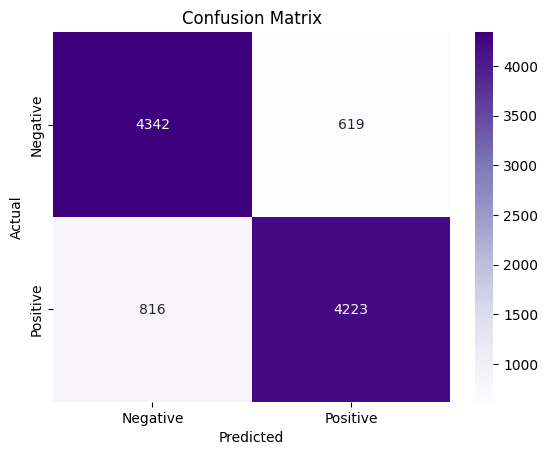

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load your IMDb dataset
df = pd.read_csv("imdb_dataset.csv")

# 2. Display first few rows
print("Sample data:")
print(df.head())

# 3. Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 4. Encode target variable
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})  # Convert text to 1/0

# 5. Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42)

# 6. Convert text to numerical features (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 7. Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 8. Make predictions
y_pred = model.predict(X_test_vec)

# 9. Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("imdb_dataset.csv")

# 1. Sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# 2. Review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=50)
plt.title("Review Word Count Distribution")
plt.xlabel("Number of Words")
plt.show()

# 3. Word clouds (requires some preprocessing)
from nltk.corpus import stopwords
import nltk
import re
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_for_wordcloud(text):
    text = text.lower()
    text = re.sub(r'<.*?>', ' ', text)  # Remove HTML
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    return " ".join([word for word in text.split() if word not in stop_words])

# Word cloud: positive reviews
positive_text = " ".join(df[df['sentiment'] == 'positive']['review'].apply(clean_for_wordcloud))
WordCloud(width=800, height=400).generate(positive_text).to_image()

# Word cloud: negative reviews
negative_text = " ".join(df[df['sentiment'] == 'negative']['review'].apply(clean_for_wordcloud))
WordCloud(width=800, height=400).generate(negative_text).to_image()


ModuleNotFoundError: No module named 'wordcloud'